# [IEMCow](https://mesonet.agron.iastate.edu/cow/): Past warnings, by zone

#### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_stiles as altstiles
import numpy as np
import requests

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")

---

# Lookup table for NWS zones to home counties

#### Read [zone-county correlation file](https://www.weather.gov/gis/ZoneCounty)

In [11]:
zones = pd.read_csv(
    "data/raw/nws_zone_to_county_lookup.txt",
    sep="|",
    header=0,
    names=[
        "state",
        "zone",
        "cwa",
        "name",
        "state_zone",
        "county",
        "fips",
        "time_zone",
        "fe_area",
        "lat",
        "lon",
    ],
)

In [14]:
zones.head()

,state,zone,cwa,name,state_zone,county,fips,time_zone,fe_area,lat,lon
0,NM,201,ABQ,Northwest Plateau,NM201,San Juan,35045,M,nw,36.4270,-108.4064
1,NM,202,ABQ,Chuska Mountains,NM202,McKinley,35031,M,nw,36.0409,-108.9296
2,NM,202,ABQ,Chuska Mountains,NM202,San Juan,35045,M,nw,36.0409,-108.9296
3,NM,203,ABQ,Far Northwest Highlands,NM203,Rio Arriba,35039,M,nc,36.6585,-107.1028
4,NM,203,ABQ,Far Northwest Highlands,NM203,Sandoval,35043,M,nc,36.6585,-107.1028


---

In [6]:
## Get warnings archive

'2022-08-12'

---

In [16]:
url = "https://mesonet.agron.iastate.edu/pickup/wwa/2022_all.zip"
target_path = "data/raw/2022_all.zip"
open_path = "data/raw/2022_all/"

In [17]:
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(target_path, "wb") as f:
        f.write(response.raw.read())

In [18]:
import tarfile

# open file
file = tarfile.open(target_path)

# print file names
print(file.getnames())

# extract files
file.extractall(open_path)

# close file
file.close()

ReadError: file could not be opened successfully

In [10]:
gdf_src = gpd.read_file(open_path)

<AxesSubplot:>

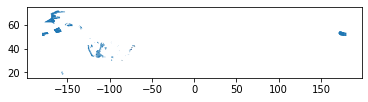

In [11]:
gdf_src.plot()

In [12]:
gdf_src.columns = gdf_src.columns.str.lower()

In [15]:
# [gdf_src["prod_type"] == "Excessive Heat Warning"].plot()

In [18]:
gdf_src[gdf_src["prod_type"].str.contains("Heat")]

,cap_id,msg_type,prod_type,vtec,phenom,sig,wfo,event,issuance,expiration,onset,ends,url,geometry
92,urn:oid:2.49.0.1.840.0.8270547d029709d310bc41f...,NPW,Heat Advisory,/O.CON.KSGX.HT.Y.0006.000000T0000Z-220814T0300Z/,HT,Y,KSGX,0006,2022-08-12T02:40:00-07:00,2022-08-12T15:00:00-07:00,2022-08-12T02:40:00-07:00,2022-08-13T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.46560 34.30283, -117.46553 34.3..."


---

## Export

In [14]:
gdf_src[gdf_src["prod_type"] == "Excessive Heat Warning"].to_file(
    f"data/processed/excessive_heat_by_county_{today}.geojson", driver="GeoJSON"
)

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:525: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
